In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import requests
import yaml

with open('config.yml') as yml_file:
    config = yaml.safe_load(yml_file)

In [3]:
df = pd.read_json('tmdb_data.json')

In [38]:
df.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
def get_image(poster_path : str)->np.ndarray:
    url = config['base_url_for_poster']+poster_path
    return np.asarray(Image.open(requests.get(url, stream=True).raw))
    

In [6]:
from deepface import DeepFace
from deepface.detectors import FaceDetector

In [31]:
url = '/4IIzut91TkSjcPYq5tkt9wr4hCt.jpg'
image = get_image(url)

In [22]:
detector = FaceDetector.build_model(config['detector_backend']) #set opencv, ssd, dlib, mtcnn or retinaface
faces = FaceDetector.detect_faces(detector,config['detector_backend'],image)
outputs = []
for face in faces :
    output = DeepFace.analyze(face[0], enforce_detection=False, detector_backend = config['detector_backend'], actions=('gender', 'age'))
    one_face_analyse = [output['gender'], output['region']['h']*output['region']['w']/(image.shape[0]*image.shape[1])]
    outputs.append(one_face_analyse)


Action: age: 100%|██████████| 2/2 [00:02<00:00,  1.19s/it]   


In [19]:
outputs

[['neutral', 'Woman', 'white', 0.012640569395017794],
 ['angry', 'Man', 'white', 0.012640569395017794],
 ['neutral', 'Man', 'asian', 0.010804270462633452]]

In [9]:
import matplotlib.pyplot as plt

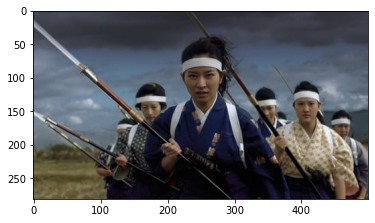

In [32]:
plt.imshow(image)

In [78]:
def clear_output(results):
    nb_women, nb_men, area_men, area_women = 0,0,0,0
    for result in results:
        if result[1]=='Woman': 
            nb_women+=1
            area_women+=result[-1]
        else : 
            nb_men+=1
            area_men+= result[-1]
    return  nb_women, nb_men, area_women, area_men
        
    

In [79]:
clear_output(outputs)

(5, 0, 0.06644533333333333, 0)

In [39]:
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from imdb import Cinemagoer

# create an instance of the Cinemagoer class
ia = Cinemagoer()

# get a movie
movie = Cinemagoer().get_movie(x)['synopsis']


In [40]:
df['summary'] = df['imdbid'].progress_apply(lambda x :Cinemagoer().get_movie(x)['synopsis'] )

KeyError: 'imdbid'

In [41]:
df

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/6vYffq6NoneNmNPp6IsobnnlrHS.jpg,None,0,"[{'id': 99, 'name': 'Documentary'}]",,315946,tt3155794,fr,Passage de Venus,...,1874-12-09,0,1.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,,Passage of Venus,False,6.2,63
1,False,None,None,0,"[{'id': 16, 'name': 'Animation'}]",,766094,tt14495706,xx,La Rosace Magique,...,1878-05-07,0,1.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,,The Magic Rosette,False,6.4,7
2,False,/sZY4QiduYnB07OeVYdCo9H3oL8b.jpg,None,0,"[{'id': 16, 'name': 'Animation'}, {'id': 99, '...",,194079,tt2221420,xx,Sallie Gardner at a Gallop,...,1878-06-14,0,1.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,,Sallie Gardner at a Gallop,False,6.7,109
3,False,None,None,153,"[{'id': 16, 'name': 'Animation'}]",,751212,tt12592084,xx,Le Singe Musicien,...,1878-05-07,0,1.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,,The Musician Monkey,False,6.6,9
4,False,None,None,0,"[{'id': 99, 'name': 'Documentary'}]",,502575,tt7816420,xx,Athlete Swinging a Pick,...,1881-01-01,0,1.0,"[{'english_name': 'No Language', 'iso_639_1': ...",Released,,Athlete Swinging a Pick,False,5.4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,False,/4wfA61Mi6E8GncUn8ze4w0jz0Za.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",,517088,tt4995540,en,Being the Ricardos,...,2021-12-10,0,132.0,"[{'english_name': 'Spanish', 'iso_639_1': 'es'...",Released,A story behind one of the most influential sho...,Being the Ricardos,False,6.6,369
9258,False,/hdx7y952Mn92wyZZnnkLQwou671.jpg,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",https://boilingpointfilm.co.uk/,807196,tt11127680,en,Boiling Point,...,2021-11-19,0,92.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There is no room for mistakes.,Boiling Point,False,7.3,98
9259,False,/gAsHuCQMN7mv4uFIvM4ACQ09hPr.jpg,None,0,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",https://www.thepowerofthedogmovie.com/,600583,tt10293406,en,The Power of the Dog,...,2021-11-17,0,127.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,What it means to be a man.,The Power of the Dog,False,6.8,1518
9260,False,/cv6Nn8Yt9mgFoUSievEdW9JK82A.jpg,None,0,"[{'id': 18, 'name': 'Drama'}]",https://bleeckerstreetmedia.com/mass,423333,tt11389748,en,Mass,...,2021-10-08,131357,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Face your fears.,Mass,False,7.9,88
